In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
#import scipy.special
%matplotlib inline

train_data = np.load("train.npz")
feature_set = np.reshape(train_data['image'],(12000,-1))
feature_set = (np.asfarray(feature_set)/255.0*0.99)+0.01 #正規畫

one_hot_labels = np.zeros((12000, 10))
for i in range(12000):
    one_hot_labels[i, int(train_data['label'][i])] = 1 #one hot labels
    

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x)) #sigmoid 作微分 

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

instances = feature_set.shape[0]
attributes = feature_set.shape[1]

hidden_nodes = 100
hidden_nodes2 = 2
output_labels = 10

np.random.seed( 32 )
wh = np.random.normal(0.0,pow(hidden_nodes,-0.5),(784,hidden_nodes))
np.random.seed( 33 )
bh = np.random.randn(hidden_nodes)

np.random.seed( 34 )
wh2 = np.random.normal(0.0,pow(hidden_nodes2,-0.5),(hidden_nodes,hidden_nodes2))
np.random.seed( 35 )
bh2 = np.random.randn(hidden_nodes2)

np.random.seed( 36 )
wo = np.random.normal(0.0,pow(output_labels,-0.5),(hidden_nodes2,output_labels))
np.random.seed( 37 )
bo = np.random.randn(output_labels)
lr = 0.00005#10e-4

error_cost = []

for epoch in range(5000):
    
#     if(epoch>500):
#         lr = 0.000065
#     elif(epoch>1000):
#         lr = 0.00003
#     elif(epoch>2000):
#         lr = 0.000001
#     elif(epoch>4000):
#         lr = 0.0000002
        
    #feed forward
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    zh2 = np.dot(ah, wh2) + bh2
    ah2 = sigmoid(zh2)
    
    zo = np.dot(ah2,wo) + bo
    ao = softmax(zo)

    #back propagation
    E_o = ao - one_hot_labels
    vwo = np.dot(ah2.T, E_o)
    vbo = E_o.sum(axis=0)
    
    #wo -= lr * vwo
    #bo -= lr * vbo  
    
    E_2 = np.dot(E_o, wo.T)*sigmoid_der(zh2)
    vwh2 = np.dot(ah.T, E_2)
    vbh2 = E_2.sum(axis=0)

    #wh2 -= lr * vwh2
    #bh2 -= lr * vbh2
    
    E_3 = np.dot(E_2, wh2.T)*sigmoid_der(zh)
    vwh = np.dot(feature_set.T, E_3)
    vbh = E_3.sum(axis=0)
    
    #wh -= lr * vwh
    #bh -= lr * vbh
    
    wo -= lr * vwo
    bo -= lr * vbo  
    wh2 -= lr * vwh2
    bh2 -= lr * vbh2
    wh -= lr * vwh
    bh -= lr * vbh
    
    if(epoch == 1000):
        epo_ah2 = ah2
        epo_ao = ao


    loss = np.sum(-one_hot_labels * np.log(ao))
    if epoch % 100 == 0: 
        print('Loss function value: ',epoch, loss)
    error_cost.append(loss)

Loss function value:  0 30371.2135198479
Loss function value:  100 19673.647708137403
Loss function value:  200 16787.326632253735
Loss function value:  300 15867.683288315375
Loss function value:  400 14976.66438479075
Loss function value:  500 14306.577776843258
Loss function value:  600 13786.013240125021
Loss function value:  700 13367.916102835477
Loss function value:  800 13013.38314797614
Loss function value:  900 12690.080968086628
Loss function value:  1000 12364.999638785219
Loss function value:  1100 12020.931276530086
Loss function value:  1200 11665.262555748619
Loss function value:  1300 11304.351641040781
Loss function value:  1400 10952.569115201666
Loss function value:  1500 10626.786992775002
Loss function value:  1600 10496.462298708813
Loss function value:  1700 10530.696723599718
Loss function value:  1800 9802.470215287822
Loss function value:  1900 9497.093486024052
Loss function value:  2000 9234.917950369505
Loss function value:  2100 9007.981657632125
Loss fun

In [2]:
test_data = np.load("test.npz")
test_set = np.reshape(test_data['image'],(5768,-1))
test_set = (np.asfarray(test_set)/255.0*0.99)+0.01


scorecard = []
label = [] #預測結果

t_zh = np.dot(test_set, wh) + bh
t_ah = sigmoid(t_zh)

t_zh2 = np.dot(t_ah, wh2) + bh2
t_ah2 = sigmoid(t_zh2)
    
t_zo = np.dot(t_ah2,wo) + bo
t_ao = softmax(t_zo)

for i in range(5768):
    label.append(np.argmax(t_ao[i]))

In [3]:
confusion_matrix =  np.zeros((10, 10))

for i in range(len(label)):
    confusion_matrix[int(test_data['label'][i]),int(label[i])]+=1

print("      0     1      2      3      4      5      6      7      8      9")
print("----------------------------------------------------------------------")
for i in range(10):
    print(i,"   ",end='')
    for j in range(10):
        print("{:<6d}".format(int(confusion_matrix[i][j])),end=' ')
    print("\n")

      0     1      2      3      4      5      6      7      8      9
----------------------------------------------------------------------
0    651    2      8      0      0      0      1      2      0      0      

1    3      647    7      0      0      1      0      1      2      0      

2    11     12     529    30     0      0      0      1      1      0      

3    1      0      37     521    1      20     1      12     6      1      

4    1      1      0      0      599    28     0      0      6      16     

5    0      0      0      0      7      381    2      0      1      16     

6    0      0      0      1      0      10     29     1      0      461    

7    1      0      0      5      2      6      124    296    0      15     

8    0      0      0      1      45     2      1      2      520    1      

9    0      0      0      2      10     33     2      0      2      629    



In [4]:
# a = []
# n = ['0','1','2','3','4','5','6','7','8','9']
# for i in range(12000):
#     a.append(np.argmax(ao[i]))

# plt.scatter(ah2[:,0], ah2[:,1],  c=a , cmap='plasma', s=20, alpha=1)
# plt.legend(('0','1','2','3','4','5','6','7','8','9') , loc='best')

# plt.show()

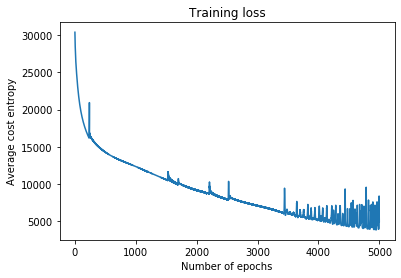

In [5]:
plt.title("Training loss")
plt.xlabel("Number of epochs")
plt.ylabel("Average cost entropy")
plt.plot(error_cost)
plt.show()

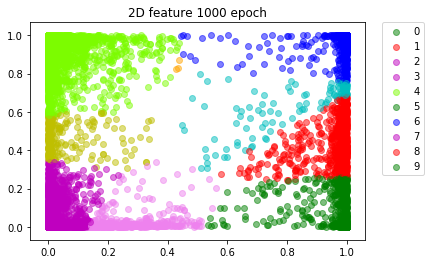

In [6]:
b = []
color = ['b','g','r','c','m','y','k','orange','violet','lawngreen']
plt.title("2D feature 1000 epoch")
for i in range(12000):
    b.append(np.argmax(epo_ao[i]))
    plt.scatter(epo_ah2[i,0], epo_ah2[i,1],c=color[b[i]],alpha=0.5)
    
plt.legend(('0','1','2','3','4','5','6','7','8','9'),loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

plt.show()

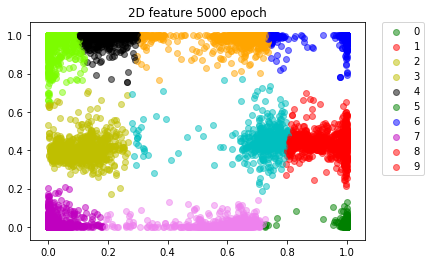

In [7]:
a = []
color = ['b','g','r','c','m','y','k','orange','violet','lawngreen']
plt.title("2D feature 5000 epoch")
for i in range(12000):
    a.append(np.argmax(ao[i]))
    plt.scatter(ah2[i,0], ah2[i,1],c=color[a[i]],alpha=0.5)
    
plt.legend(('0','1','2','3','4','5','6','7','8','9'),loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

plt.show()

In [8]:
wh = np.zeros((784,1))